<a href="https://colab.research.google.com/github/christophersingh/Car-CNN-Capstone/blob/main/car_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports here
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from matplotlib.ticker import FormatStrFormatter
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
from google.colab import files 
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

!unzip stanford-car-dataset-by-classes-folder.zip

Streaming output truncated to the last 5000 lines.
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06441.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06447.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06590.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06650.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06742.jpg  


In [ ]:
import os 
import random
def make_val_set(PATH, p):
    PATH = PATH if PATH[-1] == '/' else PATH+'/'
    cats = os.listdir(f"{PATH}train") 
    for cat in cats: 
        os.makedirs(f"{PATH}valid/{cat}", exist_ok=True)
        list_of_files = os.listdir(f"{PATH}train/{cat}")
        random.shuffle(list_of_files)
        n_idxs = int(len(list_of_files)*p)
        selected_files = [list_of_files[n] for n in range(n_idxs)]
        for file in selected_files:
            os.rename(f"{PATH}train/{cat}/{file}", f"{PATH}valid/{cat}/{file}")

make_val_set('/content/car_data/car_data', 0.2)

In [ ]:
data_dir = '/content/car_data/car_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/test'
test_dir = data_dir + '/valid'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.22))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.22))
model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = 1))
model.add(Flatten())
model.add(Dropout(0.18))
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(196, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
#test_img_path = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'
train_data = train_datagen.flow_from_directory('/content/car_data/car_data/train',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory('/content/car_data/car_data/test',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

Found 6598 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 16)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
epochs = 200

stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, min_delta=0.01)
checkpoint_filepath = '/content/checkpoint/'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

history = model.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=epochs,
                            validation_data=test_data,
                            validation_steps=50)

Epoch 1/200
100/100 [==============================] - 51s 508ms/step - loss: 5.4381 - accuracy: 0.0050 - val_loss: 6.0046 - val_accuracy: 0.0075
Epoch 2/200
100/100 [==============================] - 51s 507ms/step - loss: 5.3099 - accuracy: 0.0098 - val_loss: 7.0098 - val_accuracy: 0.0063
Epoch 3/200
100/100 [==============================] - 49s 488ms/step - loss: 5.2594 - accuracy: 0.0132 - val_loss: 6.7775 - val_accuracy: 0.0063
Epoch 4/200
100/100 [==============================] - 50s 505ms/step - loss: 5.1491 - accuracy: 0.0132 - val_loss: 6.7683 - val_accuracy: 0.0044
Epoch 5/200
100/100 [==============================] - 51s 514ms/step - loss: 5.1250 - accuracy: 0.0132 - val_loss: 7.9492 - val_accuracy: 0.0025
Epoch 6/200
100/100 [==============================] - 52s 517ms/step - loss: 5.0751 - accuracy: 0.0139 - val_loss: 5.4199 - val_accuracy: 0.0125
Epoch 7/200
100/100 [==============================] - 50s 505ms/step - loss: 5.0232 - accuracy: 0.0148 - val_loss: 5.2732 -

In [ ]:
vals = pd.DataFrame.from_dict(history.history)
vals = pd.concat([pd.Series(range(0,200),name='epochs'),vals],axis=1)
vals.head()

,epochs,loss,accuracy,val_loss,val_accuracy
0,0,5.438110,0.005000,6.004574,0.007500
1,1,5.309853,0.009770,7.009777,0.006250
2,2,5.259351,0.013237,6.777522,0.006250
3,3,5.149079,0.013237,6.768280,0.004375
4,4,5.125001,0.013237,7.949224,0.002500


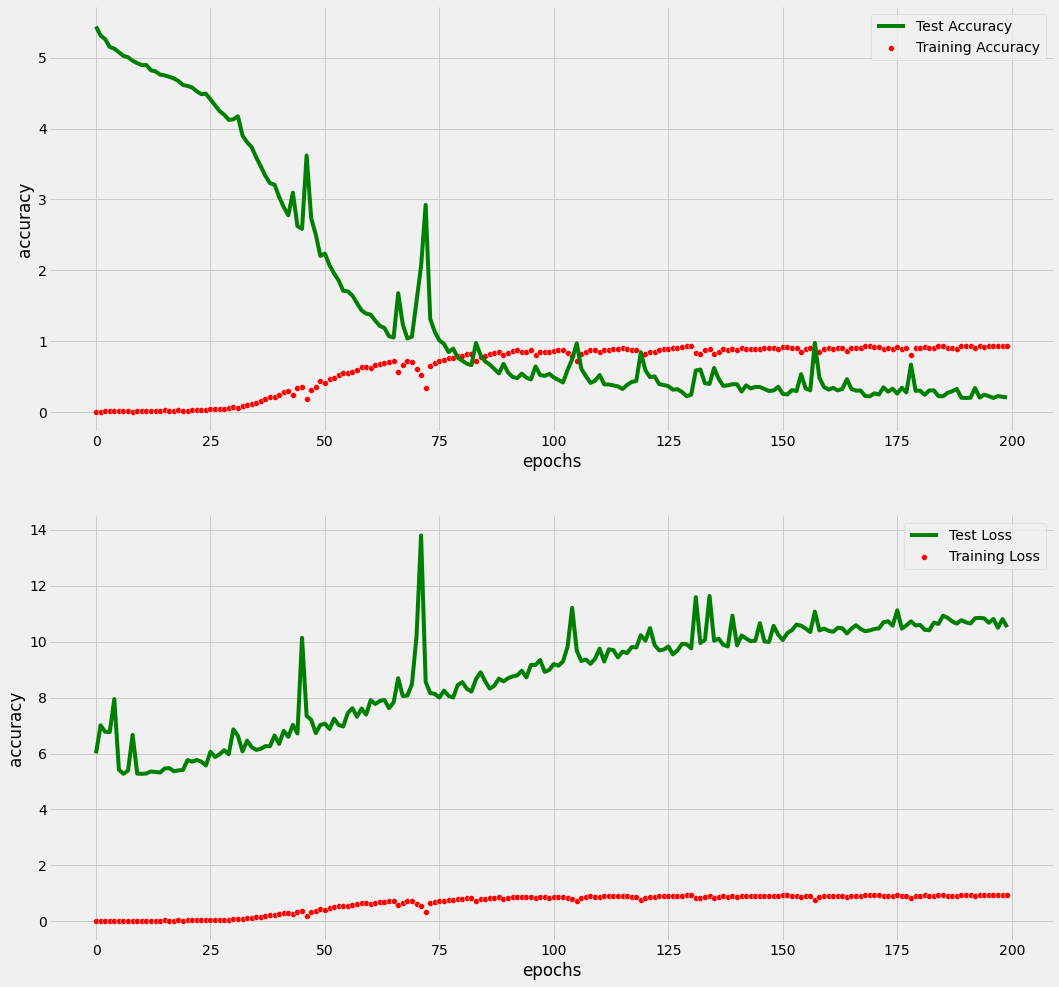

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='accuracy',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='loss',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='accuracy',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epoch = range(len(loss))
    
    plt.style.use('fivethirtyeight')
    plt.figure(1 , figsize = (15 , 7))
    plt.subplot(1 , 2  , 1)
    plt.plot(epoch , loss, 'r-' , alpha = 0.5)
    plt.plot(epoch , loss, 'ro')
    plt.title('epoch vs loss')
    plt.subplot(1 , 2 , 2)
    plt.plot(epoch , acc, 'g-' , alpha = 0.5)
    plt.plot(epoch , acc, 'go')
    plt.title('epoch vs accuracy')
    plt.show()

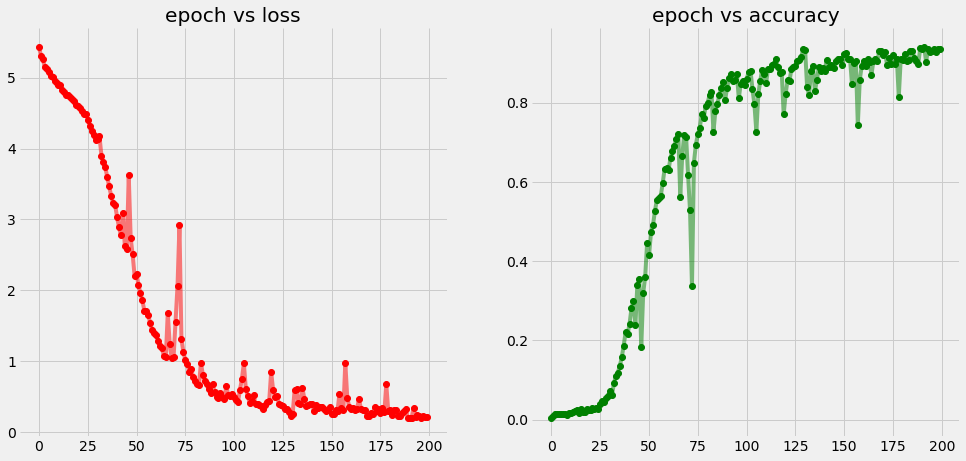

In [ ]:
plot_loss(history)

In [ ]:
from keras.preprocessing import image
test_img = []
actual = []
test_img_path = '/content/car_data/car_data/test'

from keras.applications.inception_v3 import InceptionV3 , preprocess_input , decode_predictions

for brand in os.listdir(test_img_path):
    n = 0
    for img in os.listdir(test_img_path+'/'+brand):
        n += 1
        if n == 5:
            break
        i = image.load_img(test_img_path+'/'+brand+'/'+img , target_size = (128,128))
        i = image.img_to_array(i)
        i = preprocess_input(i)
        actual.append(brand)
        test_img.append(i)   

In [ ]:
test_img = np.array(test_img)

In [ ]:
actual = np.array(actual)

In [ ]:
pred = model.predict(test_img)

In [ ]:
pred_class = []
for i in range(len(pred)):
    pred_class.append(np.argmax(pred[i]))

In [ ]:
pred_class = np.array(pred_class)

In [ ]:
car_name_train = {}
train_img_path = '/content/car_data/car_data/valid'
for i in os.listdir(train_img_path):
    car_name_train[i] =  os.listdir(train_img_path+'/'+i)
    
car_classes = []
for i in car_name_train:
    car_classes.append(i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

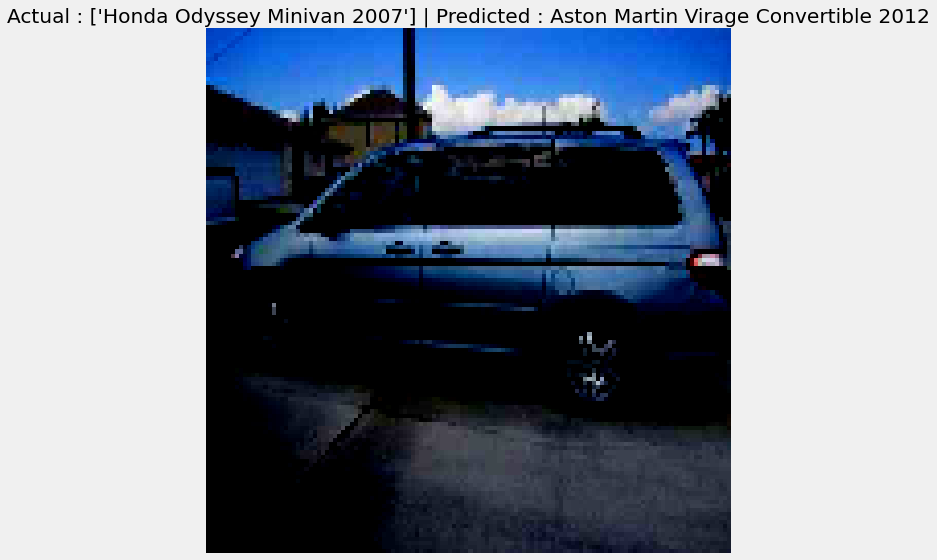

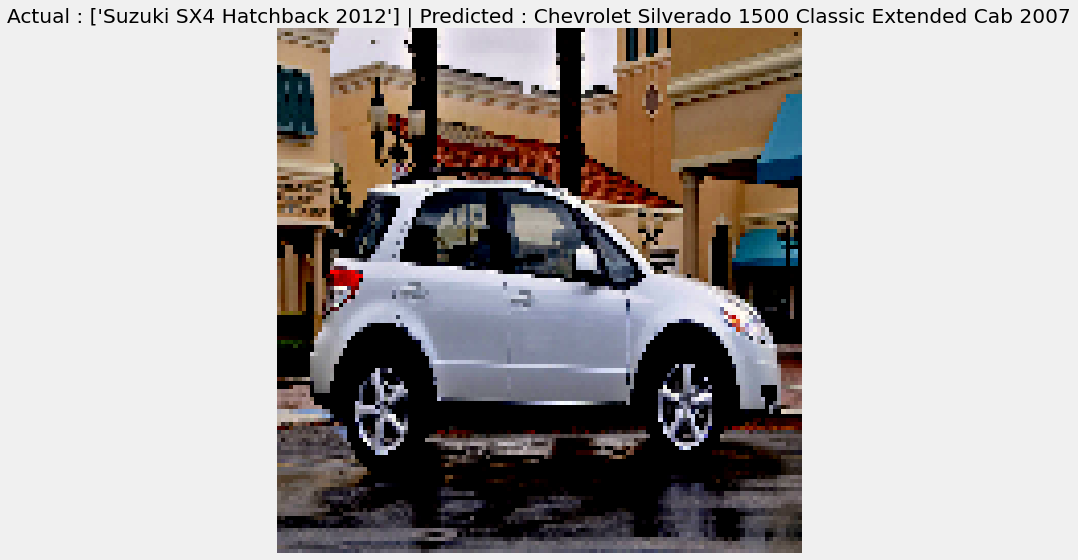

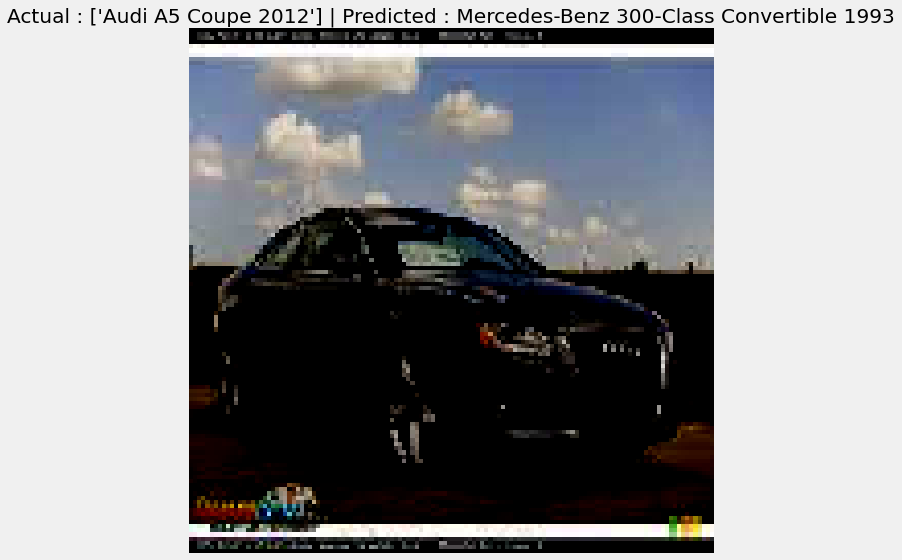

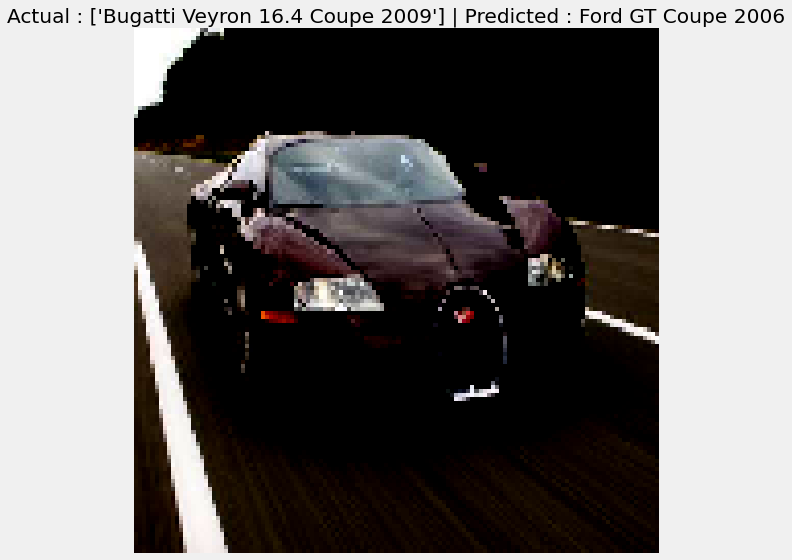

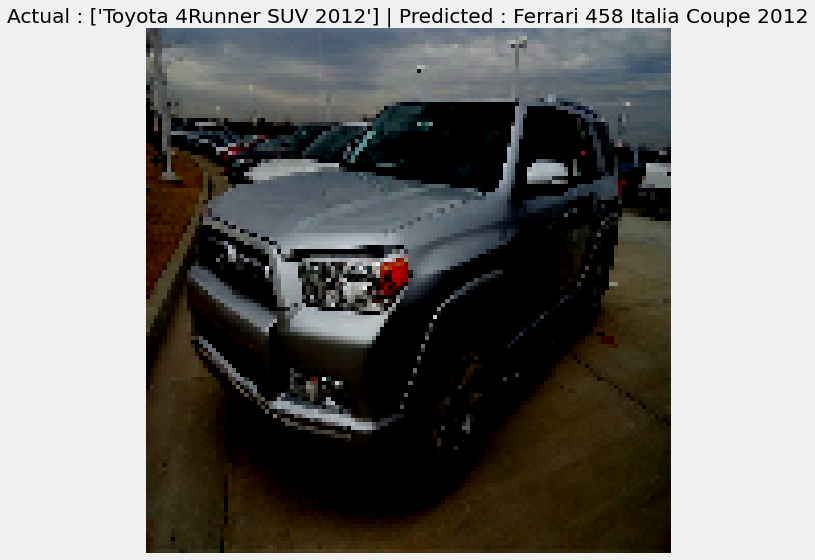

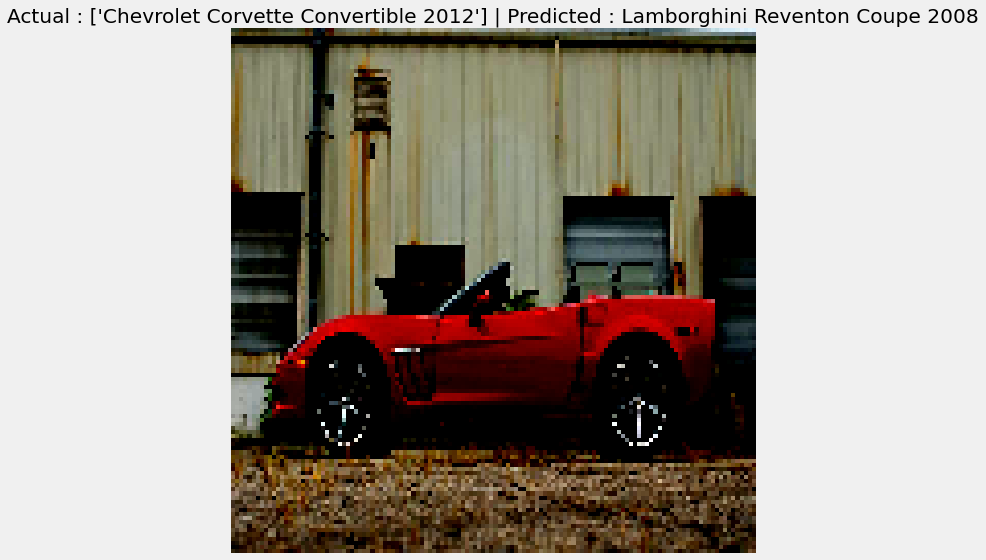

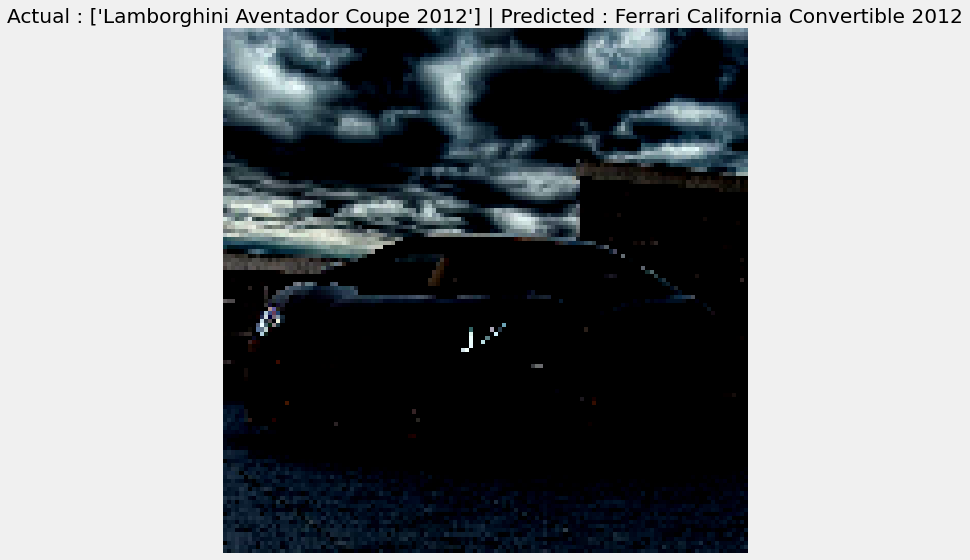

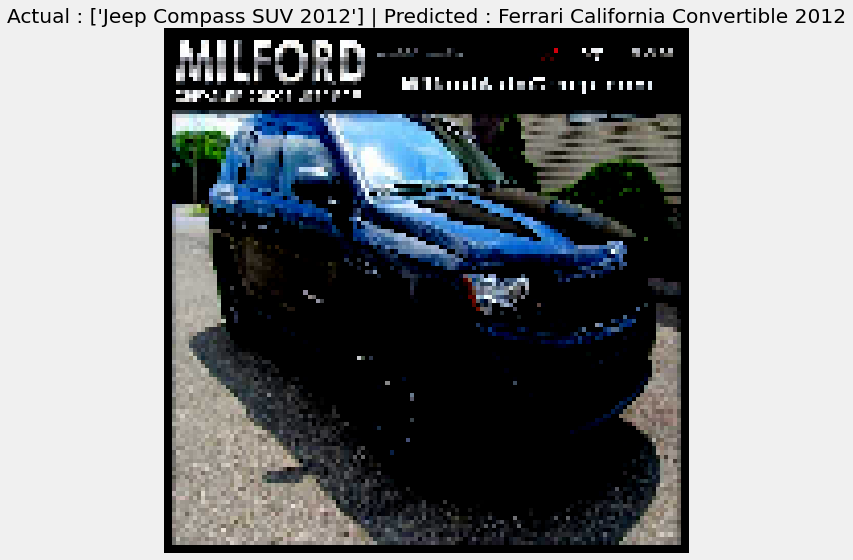

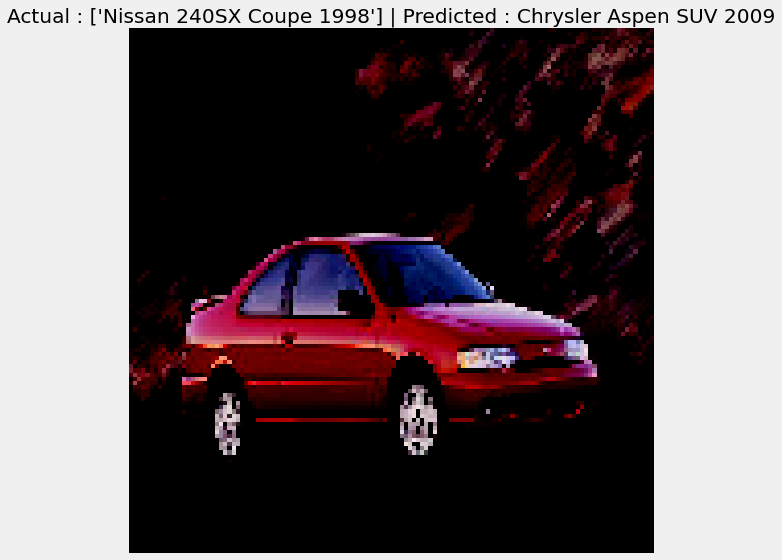

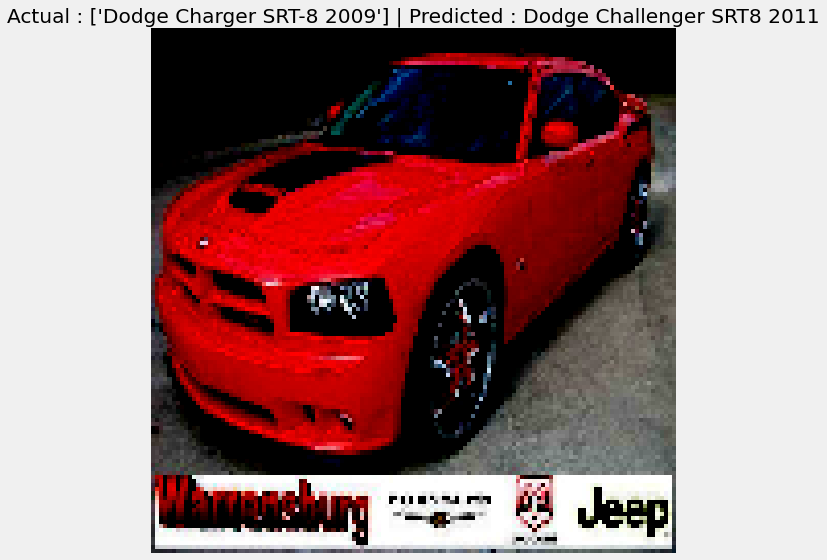

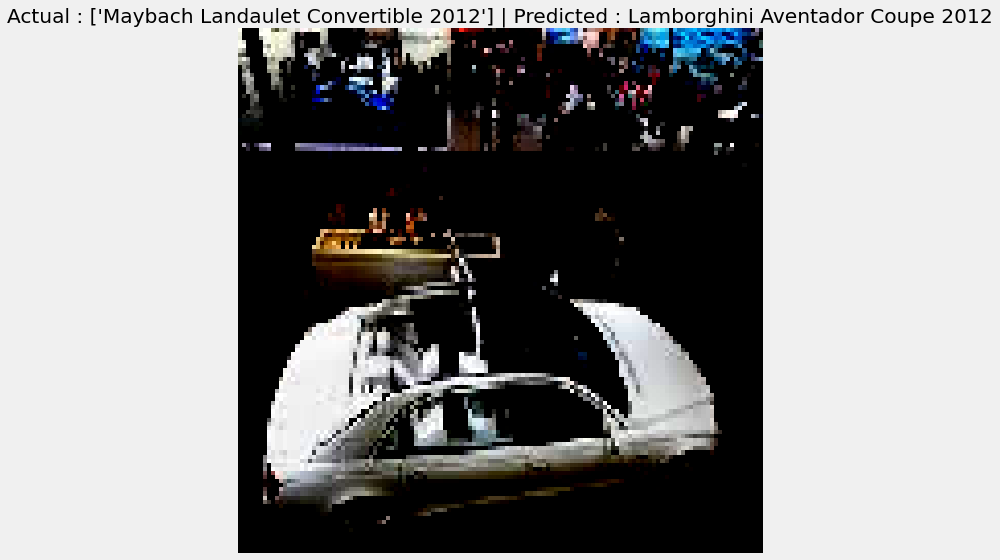

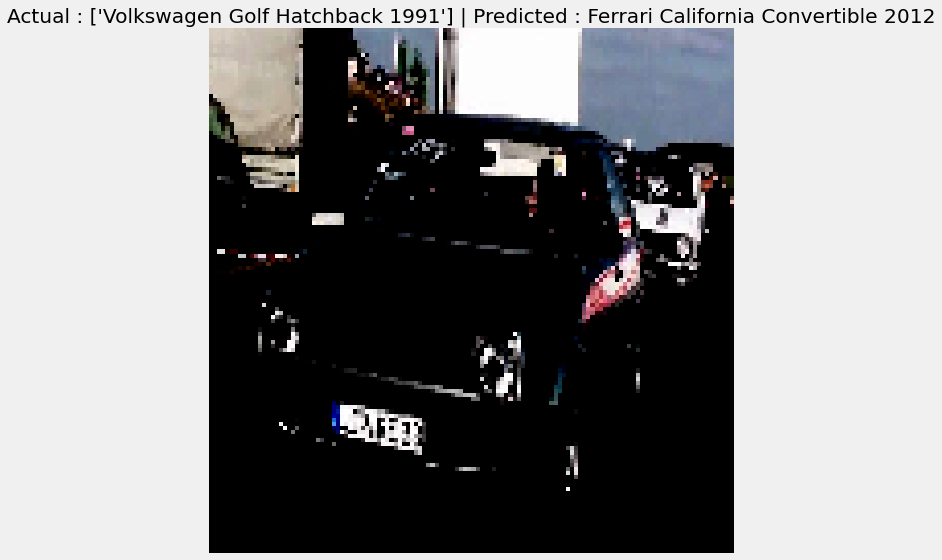

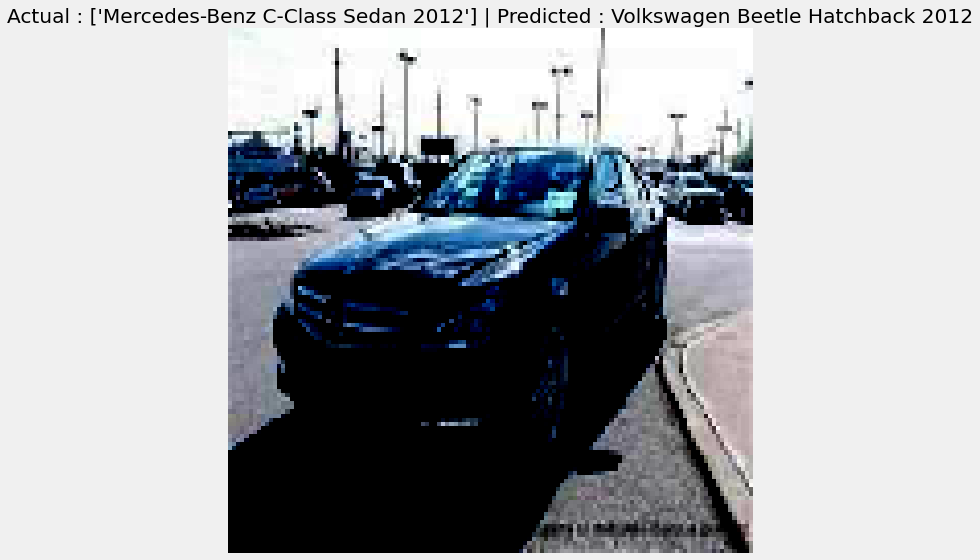

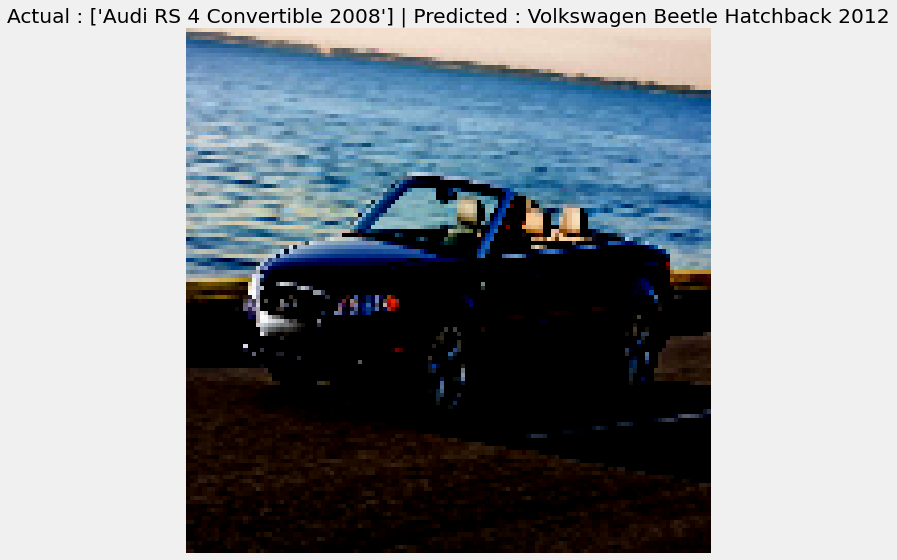

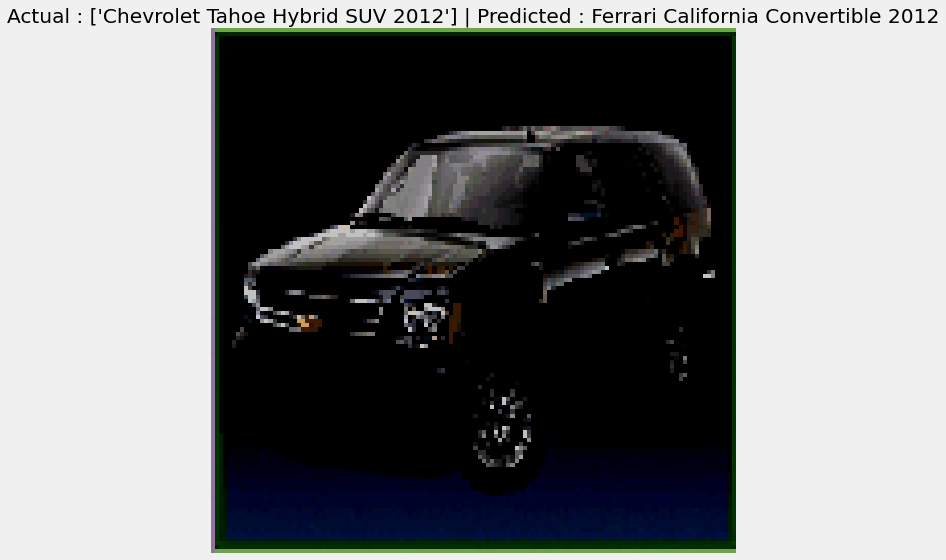

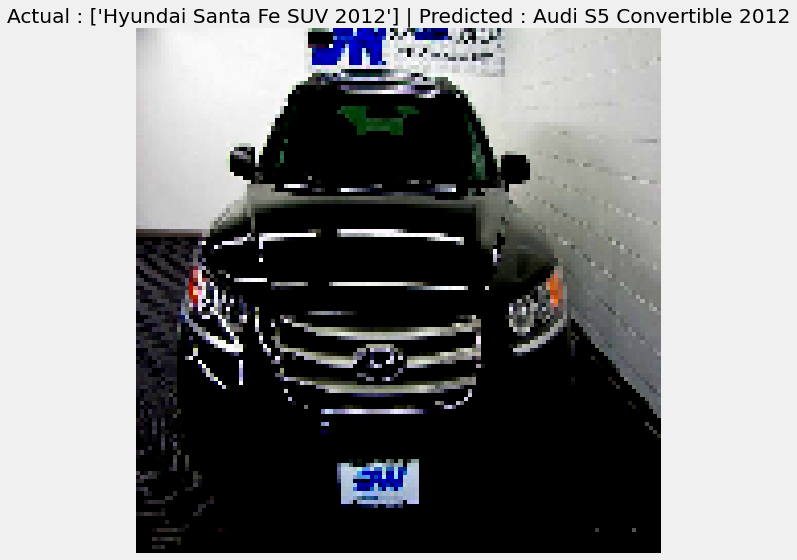

In [ ]:
import numpy as np

n = 0
for i in range(16):
    n += 1
    r = np.random.randint(0 , 784 , 1)
    
    plt.figure(n , figsize = (15 , 9))
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_img[r][0])
    plt.title('Actual : {} | Predicted : {}'.format(actual[r] , car_classes[pred_class[r][0]]))
    plt.xticks([]) , plt.yticks([])
    
    if n == 16:
        break
        
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from skimage import io 
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False,input_shape=(128,128,3))

augmented_model = Sequential()

augmented_model.add(base_model)  
augmented_model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
augmented_model.add(MaxPooling2D(pool_size = (2,2)))
augmented_model.add(BatchNormalization(axis = 1))
augmented_model.add(Dropout(0.22))
augmented_model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
augmented_model.add(MaxPooling2D(pool_size = (2,2)))
augmented_model.add(BatchNormalization(axis = 1))
augmented_model.add(Dropout(0.22))
augmented_model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
#augmented_model.add(MaxPooling2D(pool_size = (2,2)))
augmented_model.add(BatchNormalization(axis = 1))
augmented_model.add(Dropout(0.22))
augmented_model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
augmented_model.add(BatchNormalization(axis = 1))
augmented_model.add(Dropout(0.2))
augmented_model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (128,128,3)))
augmented_model.add(BatchNormalization(axis = 1))
augmented_model.add(Flatten())
augmented_model.add(Dropout(0.18))
augmented_model.add(Dense(512, activation = 'relu'))
augmented_model.add(BatchNormalization())
augmented_model.add(Dense(196, activation = 'sigmoid'))



17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
augmented_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 16)          409616    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 16)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 2, 16)          8         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 16)          6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 16)          0

In [ ]:
for i, layer in enumerate(augmented_model.layers):
   if (i==0):
     layer.trainable = False 
     print(f"Layer {i} (Non-trainable): {layer}")
   else:
      layer.trainable = True 
      print(f"Layer {i} (Trainable): {layer}")

Layer 0 (Non-trainable): <tensorflow.python.keras.engine.functional.Functional object at 0x7fad3040a0f0>
Layer 1 (Trainable): <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fad30128940>
Layer 2 (Trainable): <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fad30128e80>
Layer 3 (Trainable): <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7facda0cd470>
Layer 4 (Trainable): <tensorflow.python.keras.layers.core.Dropout object at 0x7facda0cdb70>
Layer 5 (Trainable): <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7facda0d36a0>
Layer 6 (Trainable): <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7facda0f7e80>
Layer 7 (Trainable): <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7facda07e278>
Layer 8 (Trainable): <tensorflow.python.keras.layers.core.Dropout object at 0x7facda07e0b8>
Layer 9 (Trainable): <tensorflow.python.keras.layers.convolutional.Conv2D object 

In [ ]:
data_path = '/content/car_data/car_data/train'
data_path_valid = '/content/car_data/car_data/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input) 

In [ ]:
train_generator = train_datagen.flow_from_directory(data_path,
                                                    target_size=(128,128),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(data_path_valid,
                                                    target_size=(128,128),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 6598 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [12]:
# Now we can prepaire our model for training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
augmented_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, min_delta=0.01)
checkpoint_filepath = '/content/checkpoint/augmented'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

step_size_train = train_generator.n / train_generator.batch_size
step_size_valid = validation_generator.n / validation_generator.batch_size

hist = augmented_model.fit(train_generator, steps_per_epoch=step_size_train, epochs=75,validation_data=validation_generator, validation_steps=step_size_valid)

Epoch 1/75
207/206 [==============================] - 164s 794ms/step - loss: 5.4012 - accuracy: 0.0065 - val_loss: 5.3226 - val_accuracy: 0.0051
Epoch 2/75
207/206 [==============================] - 163s 789ms/step - loss: 5.1599 - accuracy: 0.0097 - val_loss: 5.1849 - val_accuracy: 0.0098
Epoch 3/75
207/206 [==============================] - 162s 784ms/step - loss: 4.9163 - accuracy: 0.0109 - val_loss: 4.8087 - val_accuracy: 0.0138
Epoch 4/75
207/206 [==============================] - 161s 777ms/step - loss: 4.8270 - accuracy: 0.0130 - val_loss: 4.7918 - val_accuracy: 0.0146
Epoch 5/75
207/206 [==============================] - 158s 761ms/step - loss: 4.8002 - accuracy: 0.0118 - val_loss: 4.7149 - val_accuracy: 0.0147
Epoch 6/75
207/206 [==============================] - 157s 759ms/step - loss: 4.7726 - accuracy: 0.0177 - val_loss: 4.7551 - val_accuracy: 0.0177
Epoch 7/75
207/206 [==============================] - 161s 780ms/step - loss: 4.7358 - accuracy: 0.0171 - val_loss: 4.7267 -

In [13]:
data_path_predict = '/content/car_data/car_data/test'
image_files = [
    "/content/car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg",
    "/content/car_data/car_data/test/Acura Integra Type R 2001/00128.jpg",
    "/content/car_data/car_data/test/Acura RL Sedan 2012/00183.jpg",
    "/content/car_data/car_data/test/Acura TL Sedan 2012/00043.jpg",
    "/content/car_data/car_data/test/Acura TL Type-S 2008/00022.jpg",
    "/content/car_data/car_data/test/Acura TSX Sedan 2012/00030.jpg",
    "/content/car_data/car_data/test/Acura ZDX Hatchback 2012/00036.jpg",
    "/content/car_data/car_data/test/Aston Martin V8 Vantage Convertible 2012/00239.jpg",
    "/content/car_data/car_data/test/Aston Martin V8 Vantage Coupe 2012/00119.jpg",
    "/content/car_data/car_data/test/Aston Martin Virage Convertible 2012/00158.jpg",
    "/content/car_data/car_data/test/Aston Martin Virage Coupe 2012/00326.jpg",
    "/content/car_data/car_data/test/Audi 100 Sedan 1994/00082.jpg",
    "/content/car_data/car_data/test/Audi 100 Wagon 1994/00070.jpg",
    "/content/car_data/car_data/test/Audi A5 Coupe 2012/00302.jpg",
    "/content/car_data/car_data/test/Audi R8 Coupe 2012/00309.jpg",
    "/content/car_data/car_data/test/Audi RS 4 Convertible 2008/00112.jpg",
    "/content/car_data/car_data/test/Audi S4 Sedan 2007/00210.jpg",
    "/content/car_data/car_data/test/Audi S4 Sedan 2012/00133.jpg",
    "/content/car_data/car_data/test/Audi S5 Convertible 2012/00102.jpg",
    "/content/car_data/car_data/test/Audi S5 Coupe 2012/00019.jpg",
    "/content/car_data/car_data/test/Audi S6 Sedan 2011/00110.jpg",
    "/content/car_data/car_data/test/Audi TT Hatchback 2011/00450.jpg",
    "/content/car_data/car_data/test/Audi TT RS Coupe 2012/00049.jpg",
    "/content/car_data/car_data/test/Audi TTS Coupe 2012/00149.jpg",
    "/content/car_data/car_data/test/Audi V8 Sedan 1994/00810.jpg",
    "/content/car_data/car_data/test/BMW 1 Series Convertible 2012/00344.jpg",
    "/content/car_data/car_data/test/BMW 1 Series Coupe 2012/00148.jpg",
    "/content/car_data/car_data/test/BMW 3 Series Sedan 2012/00126.jpg",
    "/content/car_data/car_data/test/BMW 3 Series Wagon 2012/00039.jpg",
    "/content/car_data/car_data/test/BMW 6 Series Convertible 2007/00037.jpg",
    "/content/car_data/car_data/test/BMW ActiveHybrid 5 Sedan 2012/00152.jpg",
    "/content/car_data/car_data/test/BMW M3 Coupe 2012/00103.jpg",
    "/content/car_data/car_data/test/BMW M5 Sedan 2010/00046.jpg",
    "/content/car_data/car_data/test/BMW M6 Convertible 2010/00060.jpg",
    "/content/car_data/car_data/test/BMW X3 SUV 2012/00064.jpg",
    "/content/car_data/car_data/test/BMW X5 SUV 2007/00009.jpg",
    "/content/car_data/car_data/test/BMW X6 SUV 2012/00018.jpg",
    "/content/car_data/car_data/test/BMW Z4 Convertible 2012/00612.jpg",
    "/content/car_data/car_data/test/Bentley Arnage Sedan 2009/00277.jpg",
    "/content/car_data/car_data/test/Bentley Continental Flying Spur Sedan 2007/00034.jpg",
    "/content/car_data/car_data/test/Bentley Continental GT Coupe 2007/00069.jpg",
    "/content/car_data/car_data/test/Bentley Continental GT Coupe 2012/00317.jpg",
    "/content/car_data/car_data/test/Bentley Continental Supersports Conv. Convertible 2012/00605.jpg",
    "/content/car_data/car_data/test/Bentley Mulsanne Sedan 2011/00159.jpg",
    "/content/car_data/car_data/test/Bugatti Veyron 16.4 Convertible 2009/00163.jpg",
    "/content/car_data/car_data/test/Bugatti Veyron 16.4 Coupe 2009/00117.jpg",
    "/content/car_data/car_data/test/Buick Enclave SUV 2012/00084.jpg",
    "/content/car_data/car_data/test/Buick Rainier SUV 2007/00462.jpg",
    "/content/car_data/car_data/test/Buick Regal GS 2012/00558.jpg",
    "/content/car_data/car_data/test/Buick Verano Sedan 2012/00011.jpg",
    "/content/car_data/car_data/test/Cadillac CTS-V Sedan 2012/00016.jpg",
    "/content/car_data/car_data/test/Cadillac Escalade EXT Crew Cab 2007/00145.jpg",
    "/content/car_data/car_data/test/Cadillac SRX SUV 2012/00176.jpg",
    "/content/car_data/car_data/test/Chevrolet Avalanche Crew Cab 2012/00044.jpg",
    "/content/car_data/car_data/test/Chevrolet Camaro Convertible 2012/00143.jpg",
    "/content/car_data/car_data/test/Chevrolet Cobalt SS 2010/00850.jpg",
    "/content/car_data/car_data/test/Chevrolet Corvette Convertible 2012/00096.jpg",
    "/content/car_data/car_data/test/Chevrolet Corvette Ron Fellows Edition Z06 2007/00123.jpg",
    "/content/car_data/car_data/test/Chevrolet Corvette ZR1 2012/00559.jpg",
    "/content/car_data/car_data/test/Chevrolet Express Cargo Van 2007/00065.jpg",
    "/content/car_data/car_data/test/Chevrolet Express Van 2007/00150.jpg",
    "/content/car_data/car_data/test/Chevrolet HHR SS 2010/00010.jpg",
    "/content/car_data/car_data/test/Chevrolet Impala Sedan 2007/00118.jpg",
    "/content/car_data/car_data/test/Chevrolet Malibu Hybrid Sedan 2010/00220.jpg",
    "/content/car_data/car_data/test/Chevrolet Malibu Sedan 2007/00231.jpg",
    "/content/car_data/car_data/test/Chevrolet Monte Carlo Coupe 2007/00238.jpg",
    "/content/car_data/car_data/test/Chevrolet Silverado 1500 Classic Extended Cab 2007/00298.jpg",
    "/content/car_data/car_data/test/Chevrolet Silverado 1500 Extended Cab 2012/00038.jpg",
    "/content/car_data/car_data/test/Chevrolet Silverado 1500 Hybrid Crew Cab 2012/00454.jpg",
    "/content/car_data/car_data/test/Chevrolet Silverado 1500 Regular Cab 2012/00047.jpg",
    "/content/car_data/car_data/test/Chevrolet Silverado 2500HD Regular Cab 2012/00132.jpg",
    "/content/car_data/car_data/test/Chevrolet Sonic Sedan 2012/00079.jpg",
    "/content/car_data/car_data/test/Chevrolet Tahoe Hybrid SUV 2012/00427.jpg",
    "/content/car_data/car_data/test/Chevrolet TrailBlazer SS 2009/00351.jpg",
    "/content/car_data/car_data/test/Chevrolet Traverse SUV 2012/00345.jpg",
    "/content/car_data/car_data/test/Chrysler 300 SRT-8 2010/00191.jpg",
    "/content/car_data/car_data/test/Chrysler Aspen SUV 2009/00071.jpg",
    "/content/car_data/car_data/test/Chrysler Crossfire Convertible 2008/00520.jpg",
    "/content/car_data/car_data/test/Chrysler PT Cruiser Convertible 2008/00023.jpg",
    "/content/car_data/car_data/test/Chrysler Sebring Convertible 2010/00945.jpg",
    "/content/car_data/car_data/test/Chrysler Town and Country Minivan 2012/00006.jpg",
    "/content/car_data/car_data/test/Daewoo Nubira Wagon 2002/00088.jpg",
    "/content/car_data/car_data/test/Dodge Caliber Wagon 2007/00623.jpg",
    "/content/car_data/car_data/test/Dodge Caliber Wagon 2012/00015.jpg",
    "/content/car_data/car_data/test/Dodge Caravan Minivan 1997/00048.jpg",
    "/content/car_data/car_data/test/Dodge Challenger SRT8 2011/00090.jpg",
    "/content/car_data/car_data/test/Dodge Charger SRT-8 2009/00312.jpg",
    "/content/car_data/car_data/test/Dodge Charger Sedan 2012/00094.jpg",
    "/content/car_data/car_data/test/Dodge Dakota Club Cab 2007/00029.jpg",
    "/content/car_data/car_data/test/Dodge Dakota Crew Cab 2010/00138.jpg",
    "/content/car_data/car_data/test/Dodge Durango SUV 2007/00256.jpg",
    "/content/car_data/car_data/test/Dodge Durango SUV 2012/00359.jpg",
    "/content/car_data/car_data/test/Dodge Journey SUV 2012/00349.jpg",
    "/content/car_data/car_data/test/Dodge Magnum Wagon 2008/00100.jpg",
    "/content/car_data/car_data/test/Dodge Ram Pickup 3500 Crew Cab 2010/00131.jpg",
    "/content/car_data/car_data/test/Dodge Ram Pickup 3500 Quad Cab 2009/00104.jpg",
    "/content/car_data/car_data/test/Dodge Sprinter Cargo Van 2009/00170.jpg",
    "/content/car_data/car_data/test/Eagle Talon Hatchback 1998/00164.jpg",
    "/content/car_data/car_data/test/FIAT 500 Abarth 2012/00255.jpg",
    "/content/car_data/car_data/test/FIAT 500 Convertible 2012/00613.jpg",
    "/content/car_data/car_data/test/Ferrari 458 Italia Convertible 2012/00002.jpg",
    "/content/car_data/car_data/test/Ferrari 458 Italia Coupe 2012/00196.jpg",
    "/content/car_data/car_data/test/Ferrari California Convertible 2012/00291.jpg",
    "/content/car_data/car_data/test/Ferrari FF Coupe 2012/00262.jpg",
    "/content/car_data/car_data/test/Fisker Karma Sedan 2012/00083.jpg",
    "/content/car_data/car_data/test/Ford E-Series Wagon Van 2012/00013.jpg",
    "/content/car_data/car_data/test/Ford Edge SUV 2012/00194.jpg",
    "/content/car_data/car_data/test/Ford Expedition EL SUV 2009/00136.jpg",
    "/content/car_data/car_data/test/Ford F-150 Regular Cab 2007/00445.jpg",
    "/content/car_data/car_data/test/Ford F-150 Regular Cab 2012/00098.jpg",
    "/content/car_data/car_data/test/Ford F-450 Super Duty Crew Cab 2012/00042.jpg",
    "/content/car_data/car_data/test/Ford Fiesta Sedan 2012/00274.jpg",
    "/content/car_data/car_data/test/Ford Focus Sedan 2007/00097.jpg",
    "/content/car_data/car_data/test/Ford Freestar Minivan 2007/00012.jpg",
    "/content/car_data/car_data/test/Ford GT Coupe 2006/00212.jpg",
    "/content/car_data/car_data/test/Ford Mustang Convertible 2007/00024.jpg",
    "/content/car_data/car_data/test/Ford Ranger SuperCab 2011/00383.jpg",
    "/content/car_data/car_data/test/GMC Acadia SUV 2012/00127.jpg",
    "/content/car_data/car_data/test/GMC Canyon Extended Cab 2012/00179.jpg",
    "/content/car_data/car_data/test/GMC Savana Van 2012/00381.jpg",
    "/content/car_data/car_data/test/GMC Terrain SUV 2012/00007.jpg",
    "/content/car_data/car_data/test/GMC Yukon Hybrid SUV 2012/00056.jpg",
    "/content/car_data/car_data/test/Geo Metro Convertible 1993/00087.jpg",
    "/content/car_data/car_data/test/HUMMER H2 SUT Crew Cab 2009/00489.jpg",
    "/content/car_data/car_data/test/HUMMER H3T Crew Cab 2010/00144.jpg",
    "/content/car_data/car_data/test/Honda Accord Coupe 2012/00059.jpg",
    "/content/car_data/car_data/test/Honda Accord Sedan 2012/00105.jpg",
    "/content/car_data/car_data/test/Honda Odyssey Minivan 2007/00258.jpg",
    "/content/car_data/car_data/test/Honda Odyssey Minivan 2012/00140.jpg",
    "/content/car_data/car_data/test/Hyundai Accent Sedan 2012/00634.jpg",
    "/content/car_data/car_data/test/Hyundai Azera Sedan 2012/00295.jpg",
    "/content/car_data/car_data/test/Hyundai Elantra Sedan 2007/00014.jpg",
    "/content/car_data/car_data/test/Hyundai Elantra Touring Hatchback 2012/00415.jpg",
    "/content/car_data/car_data/test/Hyundai Genesis Sedan 2012/00051.jpg",
    "/content/car_data/car_data/test/Hyundai Santa Fe SUV 2012/00539.jpg",
    "/content/car_data/car_data/test/Hyundai Sonata Hybrid Sedan 2012/00052.jpg",
    "/content/car_data/car_data/test/Hyundai Sonata Sedan 2012/00141.jpg",
    "/content/car_data/car_data/test/Hyundai Tucson SUV 2012/00270.jpg",
    "/content/car_data/car_data/test/Hyundai Veloster Hatchback 2012/00058.jpg",
    "/content/car_data/car_data/test/Hyundai Veracruz SUV 2012/00139.jpg",
    "/content/car_data/car_data/test/Infiniti G Coupe IPL 2012/00330.jpg",
    "/content/car_data/car_data/test/Infiniti QX56 SUV 2011/00236.jpg",
    "/content/car_data/car_data/test/Isuzu Ascender SUV 2008/00106.jpg",
    "/content/car_data/car_data/test/Jaguar XK XKR 2012/00419.jpg",
    "/content/car_data/car_data/test/Jeep Compass SUV 2012/00225.jpg",
    "/content/car_data/car_data/test/Jeep Grand Cherokee SUV 2012/00032.jpg",
    "/content/car_data/car_data/test/Jeep Liberty SUV 2012/00173.jpg",
    "/content/car_data/car_data/test/Jeep Patriot SUV 2012/00003.jpg",
    "/content/car_data/car_data/test/Jeep Wrangler SUV 2012/00092.jpg",
    "/content/car_data/car_data/test/Lamborghini Aventador Coupe 2012/00021.jpg",
    "/content/car_data/car_data/test/Lamborghini Diablo Coupe 2001/00240.jpg",
    "/content/car_data/car_data/test/Lamborghini Gallardo LP 570-4 Superleggera 2012/00099.jpg",
    "/content/car_data/car_data/test/Lamborghini Reventon Coupe 2008/00285.jpg",
    "/content/car_data/car_data/test/Land Rover LR2 SUV 2012/00388.jpg",
    "/content/car_data/car_data/test/Land Rover Range Rover SUV 2012/00017.jpg",
    "/content/car_data/car_data/test/Lincoln Town Car Sedan 2011/00054.jpg",
    "/content/car_data/car_data/test/MINI Cooper Roadster Convertible 2012/00725.jpg",
    "/content/car_data/car_data/test/Maybach Landaulet Convertible 2012/00468.jpg",
    "/content/car_data/car_data/test/Mazda Tribute SUV 2011/00142.jpg",
    "/content/car_data/car_data/test/McLaren MP4-12C Coupe 2012/00172.jpg",
    "/content/car_data/car_data/test/Mercedes-Benz 300-Class Convertible 1993/00188.jpg",
    "/content/car_data/car_data/test/Mercedes-Benz C-Class Sedan 2012/00377.jpg",
    "/content/car_data/car_data/test/Mercedes-Benz E-Class Sedan 2012/00031.jpg",
    "/content/car_data/car_data/test/Mercedes-Benz S-Class Sedan 2012/00008.jpg",
    "/content/car_data/car_data/test/Mercedes-Benz SL-Class Coupe 2009/00627.jpg",
    "/content/car_data/car_data/test/Mercedes-Benz Sprinter Van 2012/00040.jpg",
    "/content/car_data/car_data/test/Mitsubishi Lancer Sedan 2012/00213.jpg",
    "/content/car_data/car_data/test/Nissan 240SX Coupe 1998/00063.jpg",
    "/content/car_data/car_data/test/Nissan Juke Hatchback 2012/00027.jpg",
    "/content/car_data/car_data/test/Nissan Leaf Hatchback 2012/00050.jpg",
    "/content/car_data/car_data/test/Nissan NV Passenger Van 2012/00474.jpg",
    "/content/car_data/car_data/test/Plymouth Neon Coupe 1999/00156.jpg",
    "/content/car_data/car_data/test/Porsche Panamera Sedan 2012/00217.jpg",
    "/content/car_data/car_data/test/Ram C-V Cargo Van Minivan 2012/00080.jpg",
    "/content/car_data/car_data/test/Rolls-Royce Ghost Sedan 2012/00712.jpg",
    "/content/car_data/car_data/test/Rolls-Royce Phantom Drophead Coupe Convertible 2012/00203.jpg",
    "/content/car_data/car_data/test/Rolls-Royce Phantom Sedan 2012/00431.jpg",
    "/content/car_data/car_data/test/Scion xD Hatchback 2012/00111.jpg",
    "/content/car_data/car_data/test/Spyker C8 Convertible 2009/00162.jpg",
    "/content/car_data/car_data/test/Spyker C8 Coupe 2009/00041.jpg",
    "/content/car_data/car_data/test/Suzuki Aerio Sedan 2007/00001.jpg",
    "/content/car_data/car_data/test/Suzuki Kizashi Sedan 2012/00208.jpg",
    "/content/car_data/car_data/test/Suzuki SX4 Hatchback 2012/00066.jpg",
    "/content/car_data/car_data/test/Suzuki SX4 Sedan 2012/00253.jpg",
    "/content/car_data/car_data/test/Tesla Model S Sedan 2012/00005.jpg",
    "/content/car_data/car_data/test/Toyota 4Runner SUV 2012/00101.jpg",
    "/content/car_data/car_data/test/Toyota Camry Sedan 2012/00004.jpg",
    "/content/car_data/car_data/test/Toyota Corolla Sedan 2012/00033.jpg",
    "/content/car_data/car_data/test/Toyota Sequoia SUV 2012/00153.jpg",
    "/content/car_data/car_data/test/Volkswagen Beetle Hatchback 2012/00089.jpg",
    "/content/car_data/car_data/test/Volkswagen Golf Hatchback 1991/00026.jpg",
    "/content/car_data/car_data/test/Volkswagen Golf Hatchback 2012/00319.jpg",
    "/content/car_data/car_data/test/Volvo 240 Sedan 1993/00369.jpg",
    "/content/car_data/car_data/test/Volvo C30 Hatchback 2012/00222.jpg",
    "/content/car_data/car_data/test/Volvo XC90 SUV 2007/00028.jpg",
    "/content/car_data/car_data/test/smart fortwo Convertible 2012/00583.jpg"



]

In [14]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3

In [15]:
img_index = 4
pred_all = []
for img_index in range(len(image_files)):
  print(image_files[img_index])
  image = io.imread(image_files[img_index]) 
  image = resize(image,output_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS), preserve_range=True)

  x = np.copy(image)               # create a copy of the image 
  x = np.expand_dims(x, axis=0)    # Add an observation dimension  
  x = preprocess_input(x)          # pre-process image, based on mobileNet pre-processing. 
  y_pred = augmented_model.predict(x)        # Apply Mobile Net to make predictions.
  pred_all.append(y_pred)
  
  print(f"Image index {img_index} predicted class : {np.argmax(y_pred)}")

/content/car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg
Image index 0 predicted class : 0
/content/car_data/car_data/test/Acura Integra Type R 2001/00128.jpg
Image index 1 predicted class : 155
/content/car_data/car_data/test/Acura RL Sedan 2012/00183.jpg
Image index 2 predicted class : 5
/content/car_data/car_data/test/Acura TL Sedan 2012/00043.jpg
Image index 3 predicted class : 162
/content/car_data/car_data/test/Acura TL Type-S 2008/00022.jpg
Image index 4 predicted class : 133
/content/car_data/car_data/test/Acura TSX Sedan 2012/00030.jpg
Image index 5 predicted class : 5
/content/car_data/car_data/test/Acura ZDX Hatchback 2012/00036.jpg
Image index 6 predicted class : 191
/content/car_data/car_data/test/Aston Martin V8 Vantage Convertible 2012/00239.jpg
Image index 7 predicted class : 13
/content/car_data/car_data/test/Aston Martin V8 Vantage Coupe 2012/00119.jpg
Image index 8 predicted class : 102
/content/car_data/car_data/test/Aston Martin Virage Convertible 2012/

In [16]:
import matplotlib.pyplot as plt

vals = pd.DataFrame.from_dict(hist.history)
vals = pd.concat([pd.Series(range(0,75),name='epochs'),vals],axis=1)
vals.head()

,epochs,loss,accuracy,val_loss,val_accuracy
0,0,5.401219,0.006517,5.322619,0.005099
1,1,5.159931,0.009700,5.184888,0.009825
2,2,4.916287,0.010912,4.808700,0.013804
3,3,4.827028,0.013034,4.791798,0.014550
4,4,4.800154,0.011822,4.714894,0.014675


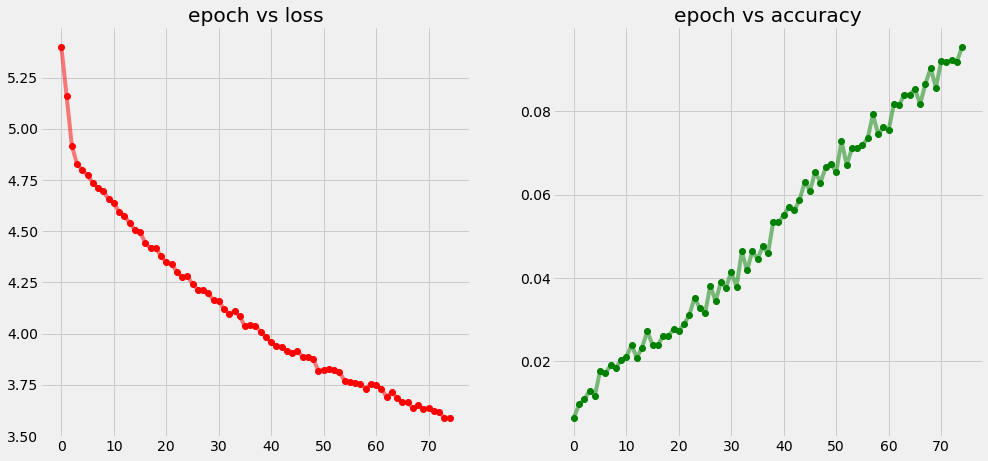

In [17]:
def plot_loss(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epoch = range(len(loss))
    
    plt.style.use('fivethirtyeight')
    plt.figure(1 , figsize = (15 , 7))
    plt.subplot(1 , 2  , 1)
    plt.plot(epoch , loss, 'r-' , alpha = 0.5)
    plt.plot(epoch , loss, 'ro')
    plt.title('epoch vs loss')
    plt.subplot(1 , 2 , 2)
    plt.plot(epoch , acc, 'g-' , alpha = 0.5)
    plt.plot(epoch , acc, 'go')
    plt.title('epoch vs accuracy')
    plt.show()

plot_loss(hist)

In [18]:
def load_image(img_file, target_size=(128,128)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

In [19]:
augmented_model.save("transfer_learning.h5")

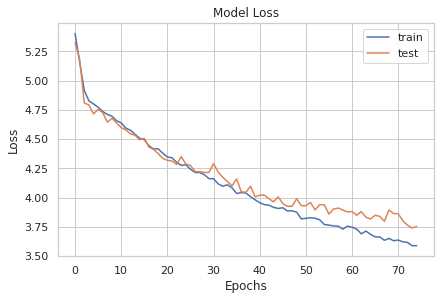

In [21]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

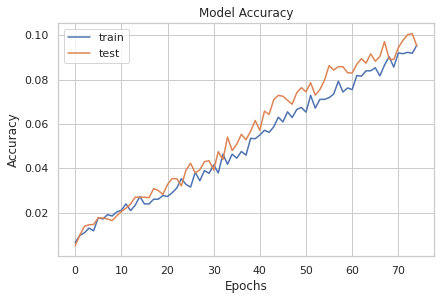

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
from keras.preprocessing import image
test_img = []
actual = []
test_img_path = '/content/car_data/car_data/test'

from keras.applications.inception_v3 import InceptionV3 , preprocess_input , decode_predictions

for brand in os.listdir(test_img_path):
    n = 0
    for img in os.listdir(test_img_path+'/'+brand):
        n += 1
        if n == 5:
            break
        i = image.load_img(test_img_path+'/'+brand+'/'+img , target_size = (128,128))
        i = image.img_to_array(i)
        i = preprocess_input(i)
        actual.append(brand)
        test_img.append(i)  

In [24]:
test_img = np.array(test_img)

In [25]:
actual = np.array(actual)

In [26]:
pred = augmented_model.predict(test_img)

In [27]:
pred_class = []
for i in range(len(pred)):
    pred_class.append(np.argmax(pred[i]))

In [28]:
pred_class = np.array(pred_class)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

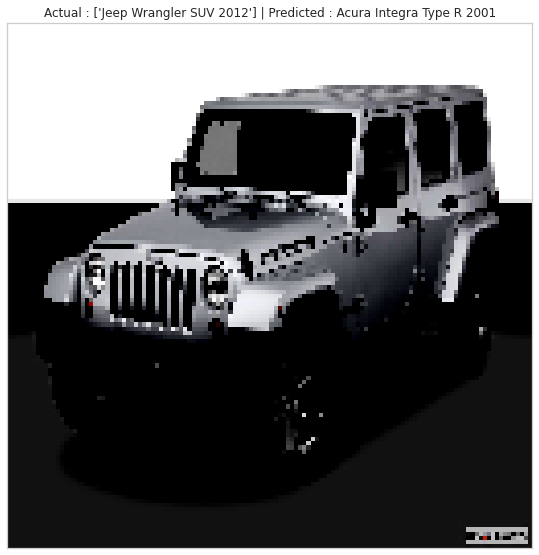

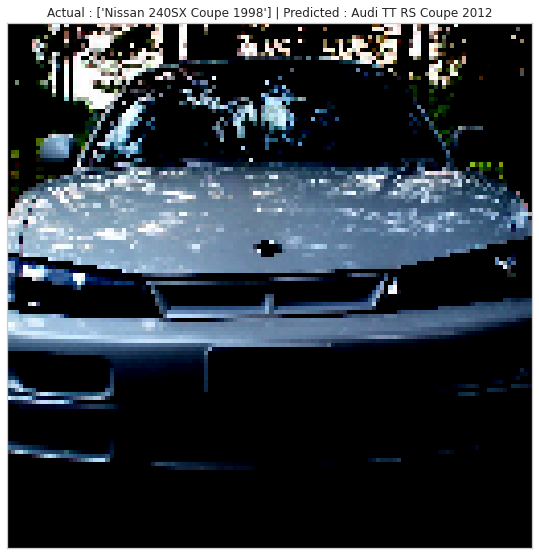

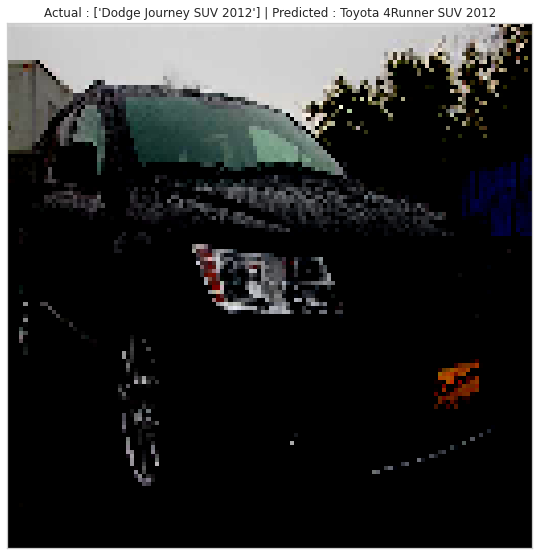

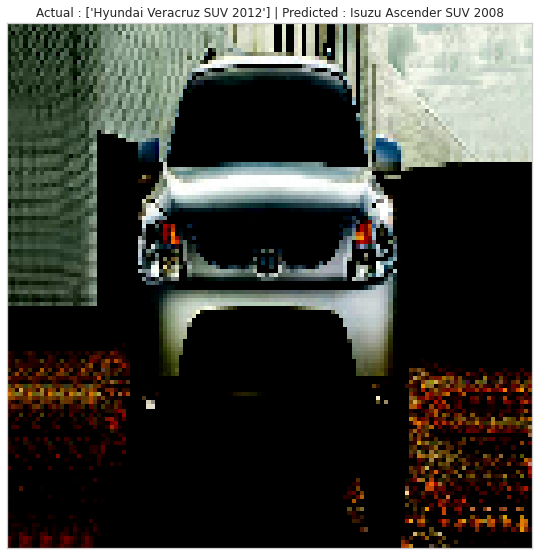

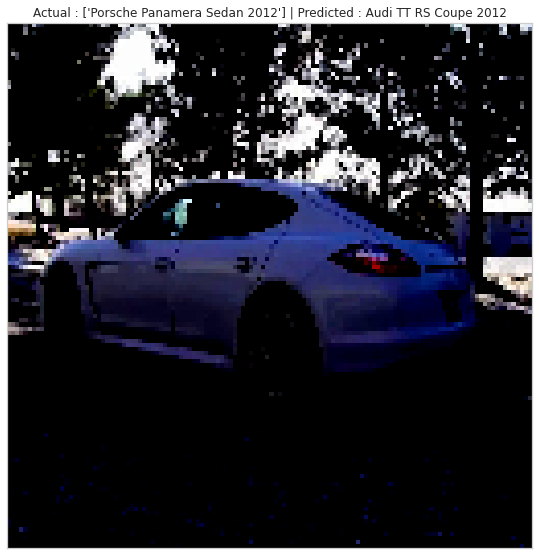

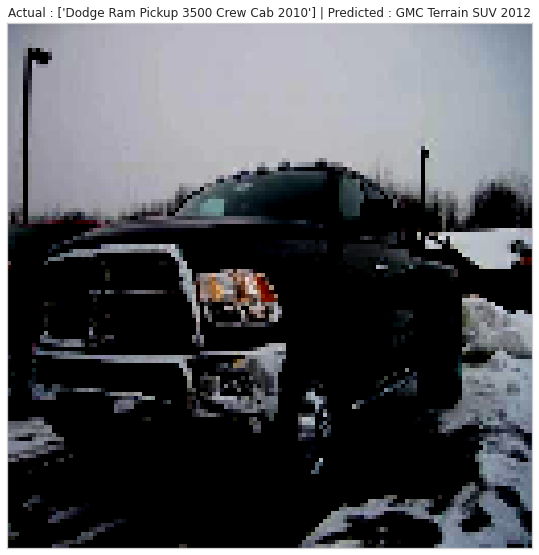

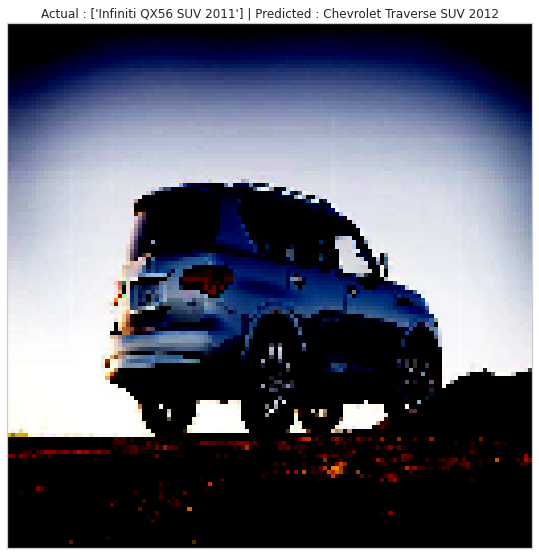

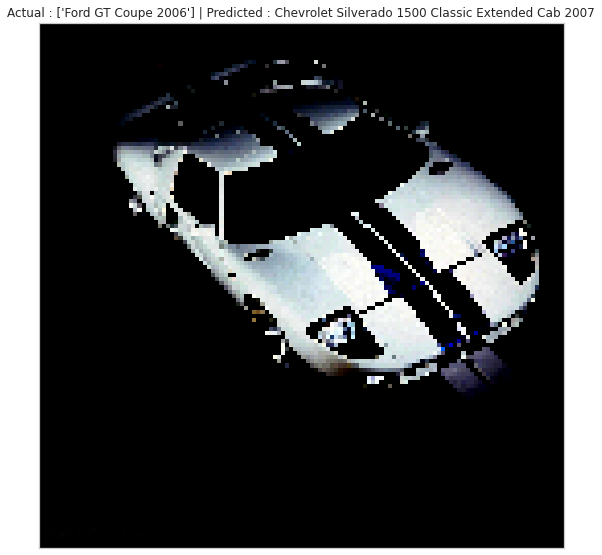

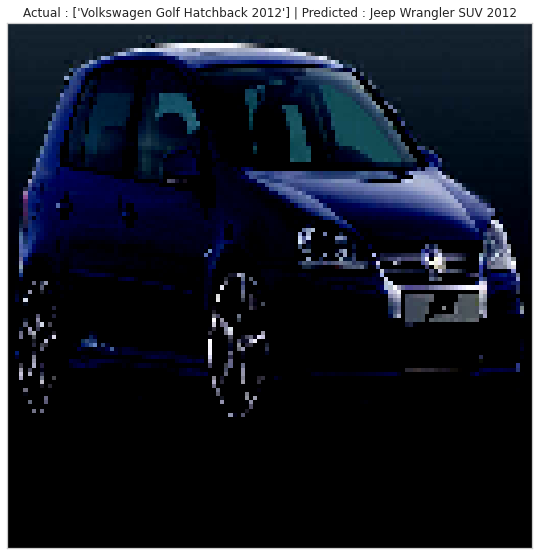

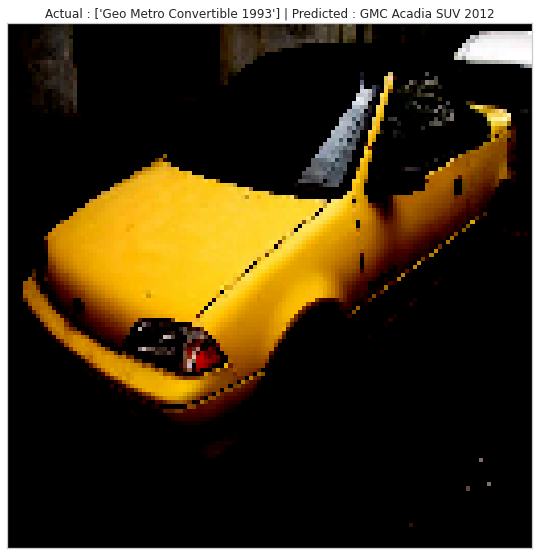

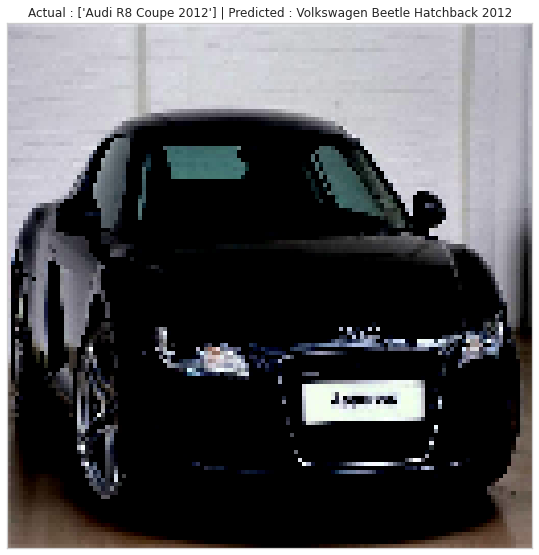

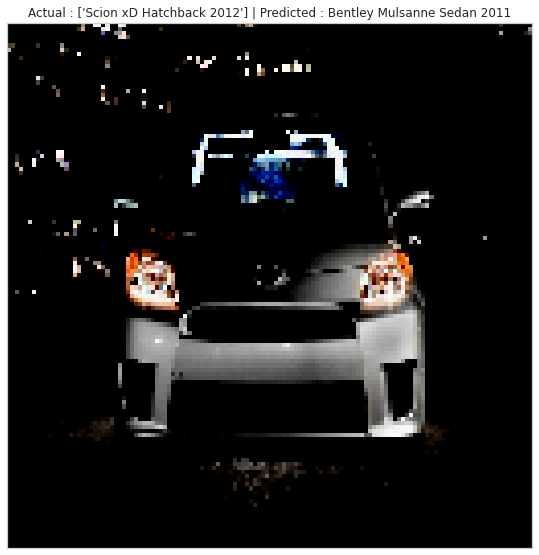

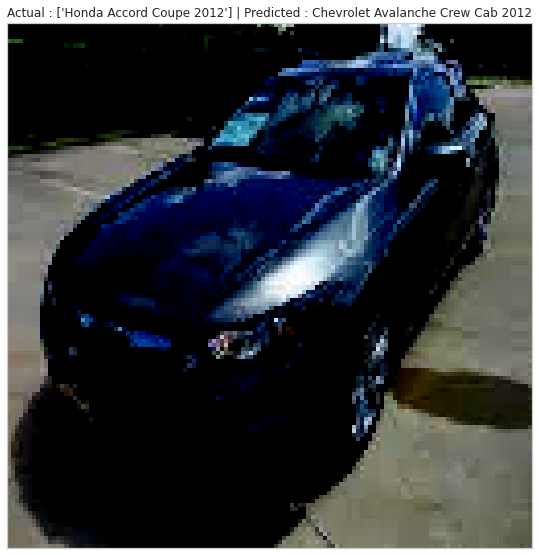

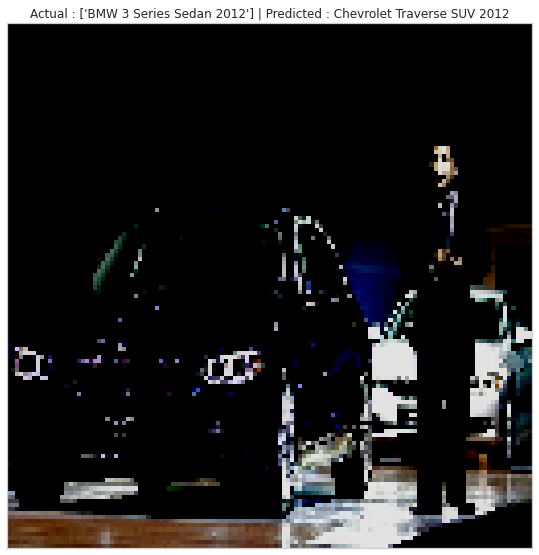

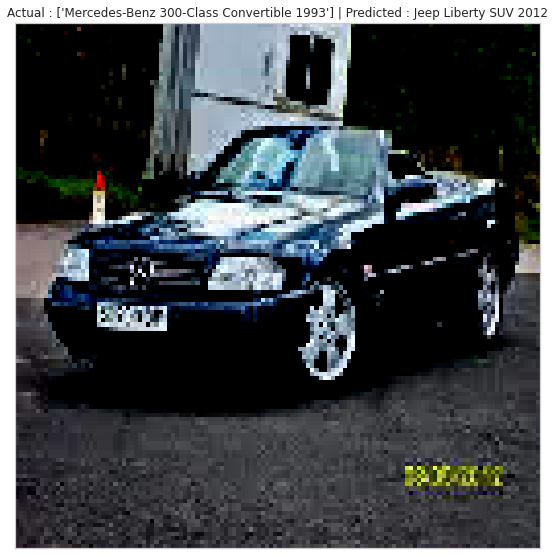

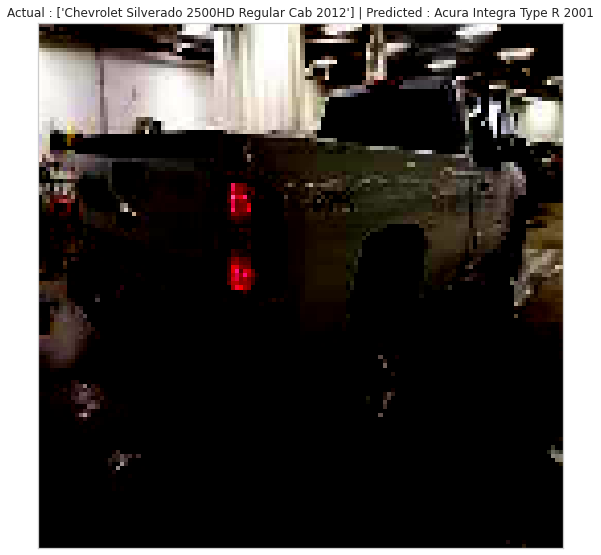

In [29]:
car_name_train = {}
train_img_path = '/content/car_data/car_data/valid'
for i in os.listdir(train_img_path):
    car_name_train[i] =  os.listdir(train_img_path+'/'+i)
    
car_classes = []
for i in car_name_train:
    car_classes.append(i)

import numpy as np

n = 0
for i in range(16):
    n += 1
    r = np.random.randint(0 , 784 , 1)
    
    plt.figure(n , figsize = (15 , 9))
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_img[r][0])
    plt.title('Actual : {} | Predicted : {}'.format(actual[r] , car_classes[pred_class[r][0]]))
    plt.xticks([]) , plt.yticks([])
    
    if n == 16:
        break
        
plt.show()